<a href="https://colab.research.google.com/github/saivarshith1110/-thedevelopersarena/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
up = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [ ]:
data = pd.read_csv("HR_comma_sep.csv")

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
data['left'].value_counts()

,count
left,
0,11428
1,3571


In [ ]:
3572/14999 * 100 #percentage of people who left

23.814920994732983

In [ ]:
data.groupby('left').mean(numeric_only= True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Observation**

*   Satisfacton level is low for left employees
*   Num of projects are higher for left employees
*   Monthly hours of work is also high for left emlpoyees
*   Time spend in the company is also high
*   Their are very less work accidents for the people how left comparing to working people
*   And the main reason is their are no promotions for them in last 5 years








```
# This is formatted as code
```



<Axes: xlabel='salary'>

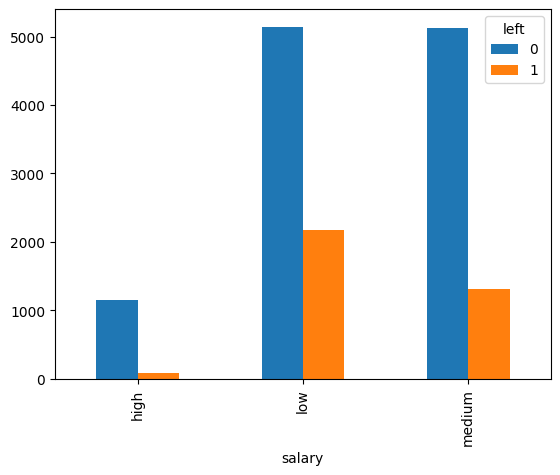

In [ ]:
pd.crosstab(data.salary,data.left).plot(kind = 'bar')


In [ ]:
#Observation
#left employees had very low salary

<Axes: xlabel='Department'>

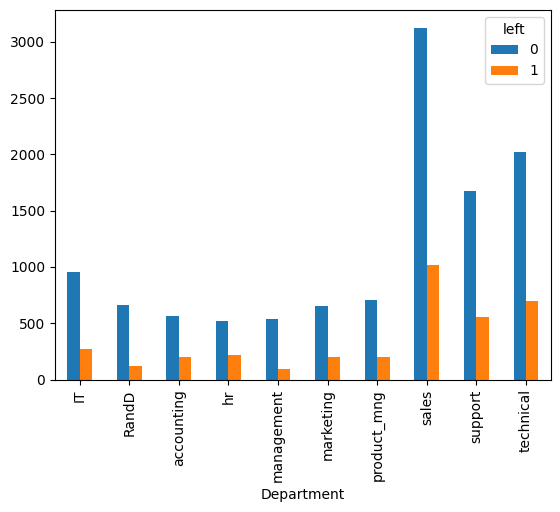

In [ ]:
pd.crosstab(data.Department,data.left).plot(kind = 'bar')

**Observation**

*  most of the employees who left are from sales dept
*  managaement dept is where least employees left
*  maybe work pressure









In [ ]:
d2 = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
d2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
Salary = pd.get_dummies(data.salary,dtype = 'int',prefix='salary')
Salary.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
final = pd.concat([d2,Salary],axis='columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
final.drop('salary',axis = 'columns',inplace = True, errors='ignore')


In [ ]:
final.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
5,0.41,153,0,0,1,0
6,0.10,247,0,0,1,0
7,0.92,259,0,0,1,0
8,0.89,224,0,0,1,0
9,0.42,142,0,0,1,0


In [ ]:
X = final
Y = data.left

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_predict = log.predict(X_test)

In [ ]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2344,0.94,191,0,0,1,0
13815,0.50,222,0,1,0,0
11582,0.58,195,0,0,1,0
8352,0.73,227,0,1,0,0
12898,0.94,266,0,0,0,1
...,...,...,...,...,...,...
8785,0.55,192,0,0,1,0
5838,0.61,181,0,0,1,0
9776,0.56,112,0,0,0,1
1541,0.61,220,0,0,1,0


In [ ]:
Y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a = accuracy_score(Y_test,Y_predict)
a

0.7726666666666666

In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3402
           1       0.58      0.26      0.36      1098

    accuracy                           0.77      4500
   macro avg       0.69      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



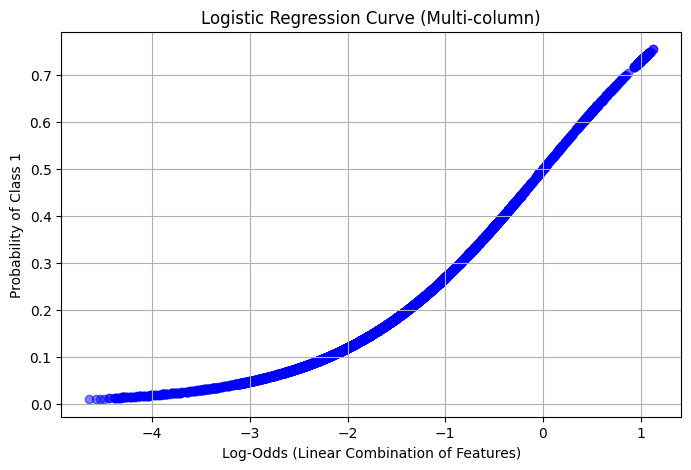

In [ ]:
probs = log.predict_proba(X_test)[:, 1]

# 2. Get the log-odds (the linear part)
log_odds = log.decision_function(X_test)

# 3. Plot
plt.figure(figsize=(8, 5))
plt.scatter(log_odds, probs, color='blue', alpha=0.5)
plt.title("Logistic Regression Curve (Multi-column)")
plt.xlabel("Log-Odds (Linear Combination of Features)")
plt.ylabel("Probability of Class 1")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

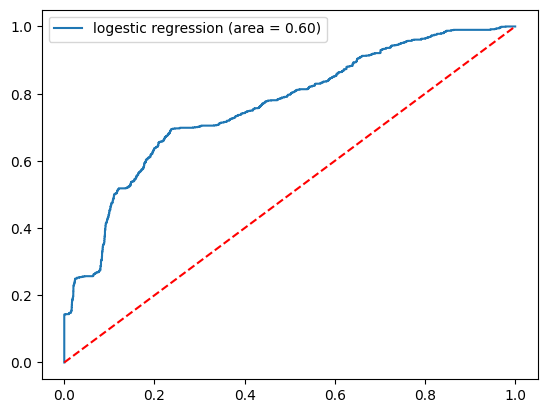

In [ ]:
logti_roc_auc = roc_auc_score(Y_test,Y_predict)
frp,trp,theshold = roc_curve(Y_test,log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(frp,trp,label = 'logestic regression (area = %0.2f)' % logti_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 'best')